# Explore

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

In [4]:
import QLEAuxV2_pub as qa

import importlib
importlib.reload(qa)

<module 'QLEAuxV2_pub' from '/home/jupyter-tatpong@kku.ac.th/Y2025/QIS/QLEAuxV2_pub.py'>

In [6]:
from QLEAuxV2_pub import grouping

In [7]:
import random

In [8]:
import time

# Subtle marking

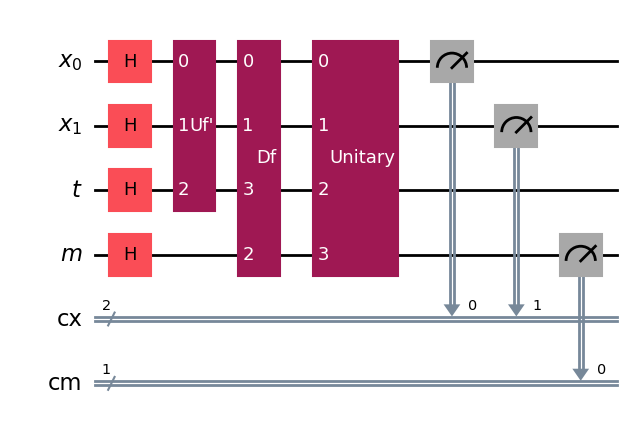

In [9]:
Ufz = qa.make_TMZ(TruthModels=("00", "01", "10", "11"), KBname="Uf'", theta=np.pi)

Dfz = qa.make_TMZ(TruthModels=("111",), KBname="Df", theta=np.pi)

x_qubit = QuantumRegister(2,'x')
t_qubit = QuantumRegister(1,'t')
m_qubit = QuantumRegister(1,'m')

crx = ClassicalRegister(2, 'cx')
crm = ClassicalRegister(1, 'cm')

qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)

# Put input into superposition
# [3,4] is the extra qubit
qc.h([0, 1, 3])

# y
qc.h(2)

# Uf: f(x) @ y
qc.append(Ufz,[0,1,2])

# Dummy
qc.append(Dfz,[0,1,3, 2])


# Inversion around mean
m = 16
A = 1/m * np.ones((m, m))
B = 2 * A - np.identity(m)
Bgate = qi.Operator(B)

qc.append(Bgate, [0,1,2,3])

qc.measure(x_qubit, crx)
qc.measure(m_qubit, crm)

qc.draw('mpl')


{'1 10': 117, '1 01': 142, '0 01': 136, '1 00': 148, '0 10': 129, '0 00': 132, '1 11': 65, '0 11': 155}


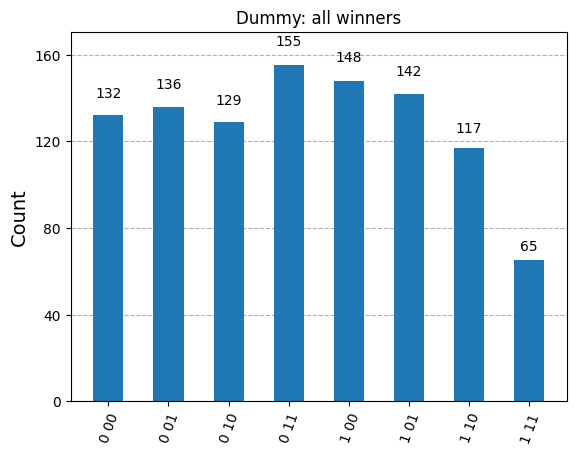

In [10]:
simulator = AerSimulator()
qc = transpile(qc, simulator)
job = simulator.run(qc)

result = job.result()

counts = result.get_counts(qc)

print(counts)
plot_histogram(counts, title='Dummy: all winners')

## All winners

In [11]:


Ufz = qa.make_TMZ(TruthModels=("00", "01", "10", "11"), KBname="Uf'", theta=np.pi)

TestCases = {'All winners': Ufz}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]

    ## Algorithm
    Dfz = qa.make_TMZ(TruthModels=("111",), KBname="Df", theta=np.pi)
    
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(1,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(1, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # Dummy
    qc.append(Dfz,[0,1,3, 2])
    
    
    # Inversion around mean
    m = 16
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)

    ##################
    # qc.draw('mpl')
    ##################
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("SubtleMark_win4.npy", Results)                

    


### After run

In [13]:
# Results = np.load("SubtleMark_win4.npy", allow_pickle=True).tolist()

TestCases = list(Results.keys())
TCs = TestCases
TCs

['All winners']

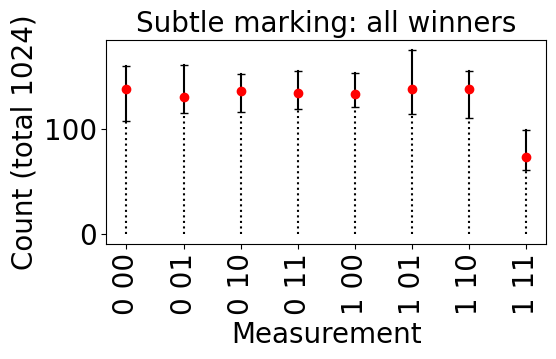

In [14]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 1

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Subtle marking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for



## No winner

In [15]:
Ufz = qa.make_TMZ(TruthModels=("00", "01", "10", "11"), KBname="Uf'", theta=0) # rotate phase by 0 = no winner

TestCases = {'No winner': Ufz}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]

    ## Algorithm
    Dfz = qa.make_TMZ(TruthModels=("111",), KBname="Df", theta=np.pi)
    
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(1,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(1, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # Dummy
    qc.append(Dfz,[0,1,3, 2])
    
    
    # Inversion around mean
    m = 16
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)

    ##################
    # qc.draw('mpl')
    ##################
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("SubtleMark_win0.npy", Results)                


### After run

In [16]:
# Results = np.load("SubtleMark_win0.npy", allow_pickle=True).tolist()

TestCases = list(Results.keys())
TCs = TestCases
TCs

['No winner']

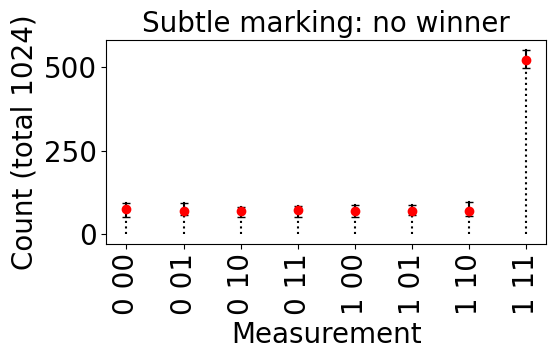

In [17]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 1

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Subtle marking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for

## One winner

In [18]:
Ufz0 = qa.make_TMZ(TruthModels=("00", ), KBname="Uf'", theta=np.pi)
Ufz1 = qa.make_TMZ(TruthModels=("01", ), KBname="Uf'", theta=np.pi)
Ufz2 = qa.make_TMZ(TruthModels=("10", ), KBname="Uf'", theta=np.pi)
Ufz3 = qa.make_TMZ(TruthModels=("11", ), KBname="Uf'", theta=np.pi)

TestCases = {'One winner: 00': Ufz0, 'One winner: 01': Ufz1,
             'One winner: 10': Ufz2, 'One winner: 11': Ufz3}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]

    ## Algorithm
    Dfz = qa.make_TMZ(TruthModels=("111",), KBname="Df", theta=np.pi)
    
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(1,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(1, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # Dummy
    qc.append(Dfz,[0,1,3, 2])
    
    
    # Inversion around mean
    m = 16
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)

    ##################
    # qc.draw('mpl')
    ##################
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("SubtleMark_win1.npy", Results)                


### After run

In [19]:
# Results = np.load("SubtleMark_win1.npy", allow_pickle=True).tolist()
Results.keys()

dict_keys(['One winner: 00', 'One winner: 01', 'One winner: 10', 'One winner: 11'])

In [20]:
TestCases = list(Results.keys())
# TCs = TestCases
print(TestCases)
# TCs = random.sample(TestCases, 2)
# TCs.sort()
TCs = ['One winner: 01', 'One winner: 11']
TCs

['One winner: 00', 'One winner: 01', 'One winner: 10', 'One winner: 11']


['One winner: 01', 'One winner: 11']

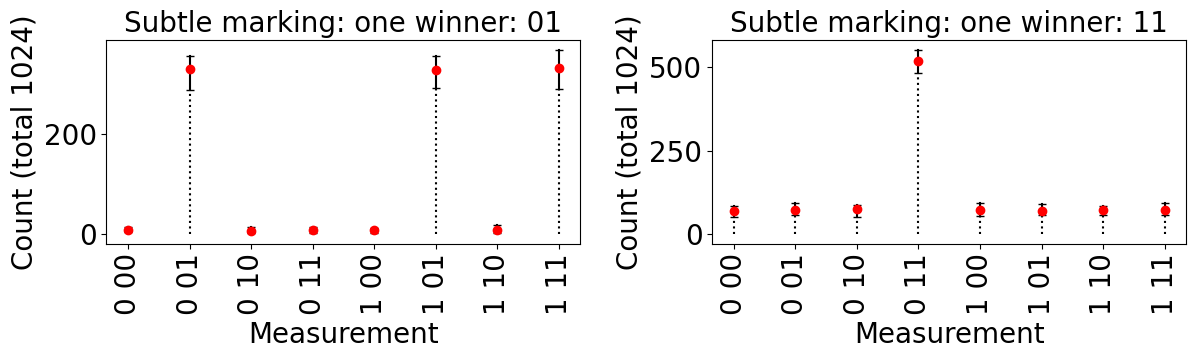

In [21]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 2

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Subtle marking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for



## Two winners

In [22]:
Ufz01 = qa.make_TMZ(TruthModels=("00", "01"), KBname="Uf'", theta=np.pi)
Ufz02 = qa.make_TMZ(TruthModels=("00", "10"), KBname="Uf'", theta=np.pi)
Ufz03 = qa.make_TMZ(TruthModels=("00", "11"), KBname="Uf'", theta=np.pi)

Ufz12 = qa.make_TMZ(TruthModels=("01", "10"), KBname="Uf'", theta=np.pi)
Ufz13 = qa.make_TMZ(TruthModels=("01", "11"), KBname="Uf'", theta=np.pi)

Ufz23 = qa.make_TMZ(TruthModels=("10", "11"), KBname="Uf'", theta=np.pi)


TestCases = {'Two winners: 00, 01': Ufz01,
             'Two winners: 00, 10': Ufz02,
             'Two winners: 00, 11': Ufz03,
             'Two winners: 01, 10': Ufz12,
             'Two winners: 01, 11': Ufz13,
             'Two winners: 10, 11': Ufz23}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]

    ## Algorithm
    Dfz = qa.make_TMZ(TruthModels=("111",), KBname="Df", theta=np.pi)
    
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(1,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(1, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # Dummy
    qc.append(Dfz,[0,1,3, 2])
    
    
    # Inversion around mean
    m = 16
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)

    ##################
    # qc.draw('mpl')
    ##################
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("SubtleMark_win2.npy", Results)                


### After run

In [23]:
# Results = np.load("SubtleMark_win2.npy", allow_pickle=True).tolist()
Results.keys()

dict_keys(['Two winners: 00, 01', 'Two winners: 00, 10', 'Two winners: 00, 11', 'Two winners: 01, 10', 'Two winners: 01, 11', 'Two winners: 10, 11'])

In [24]:
TestCases = list(Results.keys())
# TCs = TestCases
print(TestCases)
# TCs = random.sample(TestCases, 2)
# TCs.sort()
TCs = ['Two winners: 00, 11', 'Two winners: 01, 10']
TCs

['Two winners: 00, 01', 'Two winners: 00, 10', 'Two winners: 00, 11', 'Two winners: 01, 10', 'Two winners: 01, 11', 'Two winners: 10, 11']


['Two winners: 00, 11', 'Two winners: 01, 10']

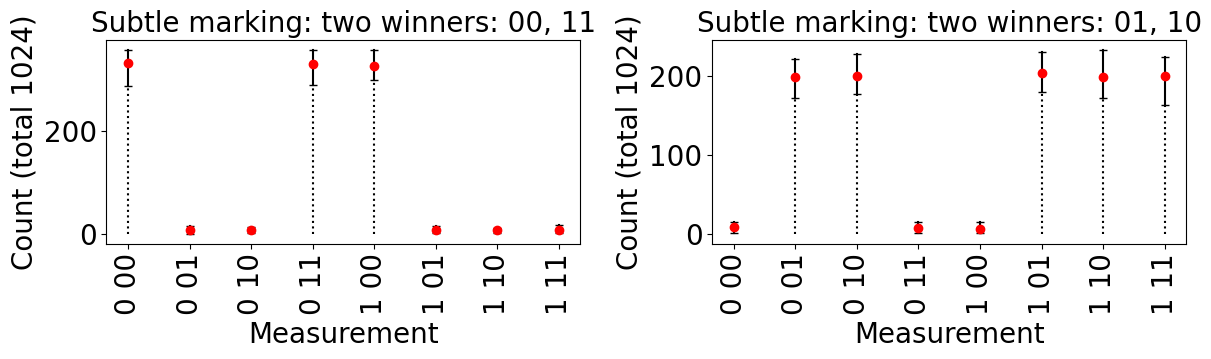

In [25]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 2

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    plt.title(f'Subtle marking: {tc[0].lower() + tc[1:]}')    
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for



## Three winners

In [26]:
Ufz012 = qa.make_TMZ(TruthModels=("00", "01", "10"), KBname="Uf'", theta=np.pi)
Ufz013 = qa.make_TMZ(TruthModels=("00", "01", "11"), KBname="Uf'", theta=np.pi)
Ufz023 = qa.make_TMZ(TruthModels=("00", "10", "11"), KBname="Uf'", theta=np.pi)
Ufz123 = qa.make_TMZ(TruthModels=("01", "10", "11"), KBname="Uf'", theta=np.pi)


TestCases = {'Three winners: 00, 01, 10': Ufz012,
             'Three winners: 00, 01, 11': Ufz013,
             'Three winners: 00, 10, 11': Ufz023,
             'Three winners: 01, 10, 11': Ufz123}

Results = {}
for tc in TestCases.keys():

    Ufz = TestCases[tc]

    ## Algorithm
    Dfz = qa.make_TMZ(TruthModels=("111",), KBname="Df", theta=np.pi)
    
    x_qubit = QuantumRegister(2,'x')
    t_qubit = QuantumRegister(1,'t')
    m_qubit = QuantumRegister(1,'m')
    
    crx = ClassicalRegister(2, 'cx')
    crm = ClassicalRegister(1, 'cm')
    
    qc = QuantumCircuit(x_qubit, t_qubit, m_qubit, crx, crm)
    
    # Put input into superposition
    # [3,4] is the extra qubit
    qc.h([0, 1, 3])
    
    # y
    qc.h(2)
    
    # Uf: f(x) @ y
    qc.append(Ufz,[0,1,2])
    
    # Dummy
    qc.append(Dfz,[0,1,3, 2])
    
    
    # Inversion around mean
    m = 16
    A = 1/m * np.ones((m, m))
    B = 2 * A - np.identity(m)
    Bgate = qi.Operator(B)
    
    qc.append(Bgate, [0,1,2,3])
    
    qc.measure(x_qubit, crx)
    qc.measure(m_qubit, crm)

    ##################
    # qc.draw('mpl')
    ##################
    simulator = AerSimulator()
    qc = transpile(qc, simulator)

    # Acquire results
    Results[tc] = []
    for irep in range(40):
        job = simulator.run(qc)        
        result = job.result()
        
        counts = result.get_counts(qc)
        Results[tc].append(counts)

# np.save("SubtleMark_win3.npy", Results)                

### After run

In [27]:
# Results = np.load("SubtleMark_win3.npy", allow_pickle=True).tolist()
Results.keys()

dict_keys(['Three winners: 00, 01, 10', 'Three winners: 00, 01, 11', 'Three winners: 00, 10, 11', 'Three winners: 01, 10, 11'])

In [28]:
TestCases = list(Results.keys())
# TCs = TestCases
print(TestCases)
# TCs = random.sample(TestCases, 2)
# TCs.sort()
TCs = ['Three winners: 00, 01, 10', 'Three winners: 00, 10, 11']
TCs

['Three winners: 00, 01, 10', 'Three winners: 00, 01, 11', 'Three winners: 00, 10, 11', 'Three winners: 01, 10, 11']


['Three winners: 00, 01, 10', 'Three winners: 00, 10, 11']

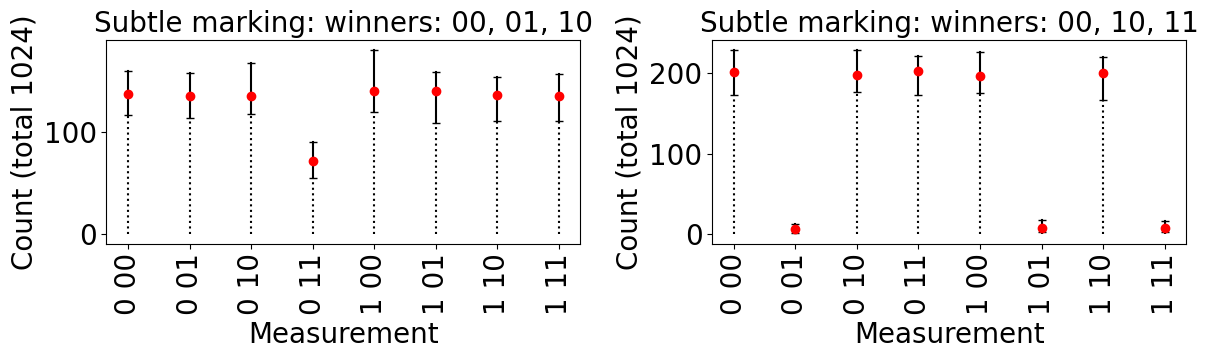

In [29]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the y tick labels
plt.rc('legend', fontsize=15)    # fontsize of the legend

nr, nc = 1, 2

fig, axes = plt.subplots(nrows=nr, ncols=nc)
fig.tight_layout(rect=[0.1, 0.1, nc, nr*0.75], h_pad=5, w_pad=2)

for i,tc in enumerate(TCs):

    StateCount = qa.collectByState(Results[tc])
    observ = list(StateCount.keys())
    observ.sort()

    plotmatx = np.zeros((0,4))
    plotmaty = np.zeros((0,4))
    for j,o in enumerate(observ):
        cmax =  np.max(StateCount[o])
        cmedian = np.median(StateCount[o])
        cmin =  np.min(StateCount[o])

        # Single plot
        plt.subplot(nr, nc, i+1)
        plt.plot([j, j], [0, cmin], 'k:')
        plt.plot([j, j, j], [cmin, cmedian, cmax], 'k_-')
        plt.plot([j], [cmedian], 'ro')
        
    # plt.title(f'Eigenmarking: {tc[0].lower() + tc[1:]}')    
    plt.title(f'Subtle marking: {tc[6:]}')        
    plt.xticks(range(len(observ)), observ, rotation=90)
    plt.ylabel('Count (total 1024)')
    plt.xlabel('Measurement')

    # break
# end for



T. Katanyukul, Toward Entailment Checking: Explore Eigenmarking Search. 
2025 3rd International Conference on Advancement in Computation & Computer Technologies (InCACCT)
17-18 April, Chandigarh University, India

# End